In [1]:
## Importing Libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

**The first step is to load images**
Matplotlib is used to display images in jupyter. If you are using normal OpenCV, **cv2.imshow()** will suffice.
<br> cv2 uses BGR color format while matplot lib uses RGB color format while reading the images. 
<br> So, we need to convert color of images from BGR to RGB using cvtColor while displaying.

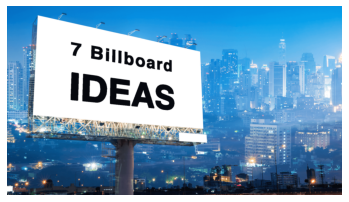

In [2]:
image_path = "test_image.png"
image = cv2.imread(image_path)
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In the above given test image, we want to apply the perspective transform on the billboard.
<br> To do so, we need to specify the **anchor points** of the billboard which are the 4 corners of the billboard
<br> The **`order_points()`** function given below arranges the 4 corner coordinates in the order of **(top-left, <br> top-right, bottom-right, bottom-left)**

In [3]:
## Function that takes a list of 2D coordinates and arranges them in the order (top-left,top-right, bottom-right, bottom-left)
def order_points(anchor_pts):
	tl, tr, br, bl = (0,0), (0,0), (0,0), (0,0)
	if len(anchor_pts) == 4:
		anchor_pts_np = np.array(anchor_pts)
		s = anchor_pts_np.sum(axis = 1)
		tl = anchor_pts_np[np.argmin(s)]
		br = anchor_pts_np[np.argmax(s)]

		diff = np.diff(anchor_pts_np, axis = 1)
		tr = anchor_pts_np[np.argmin(diff)]
		bl = anchor_pts_np[np.argmax(diff)]
	return tuple(tl), tuple(tr), tuple(br), tuple(bl)

The **`apply_perspective_transform()`** function takes the 4 corner coordinates of billboard as anchor points

In [4]:
## Function that takes an image and 4 anchor points as input and returns perspective trannsformed image.
def apply_perspective_transform(img, anchor_pts):
	tl, tr, br, bl = order_points(anchor_pts)

	width = max(int(math.dist(tl, tr)), int(math.dist(bl, br)))
	height = max(int(math.dist(tl, bl)), int(math.dist(tr, br)))

	dst = np.array([
		[0, 0],
		[width - 1, 0],
		[width - 1, height - 1],
		[0, height - 1]], dtype = "float32")

	arr = np.array([tl, tr, br, bl], dtype = "float32")

	M = cv2.getPerspectiveTransform(arr, dst)
	warped = cv2.warpPerspective(img, M, (width, height))
	return warped

Firstly we want to test the output of **`order_points()`** function.

In [5]:
if __name__=="__main__":
    ## The 4 corners of the billboard in the above image in no particular order
    anchor_points = [(512, 121), (68, 290), (82, 85), (520, 325)]
    
    tl, tr, br, bl = order_points(anchor_points)
    anchor_points = [tl, tr, br, bl]
    print(anchor_points)

[(82, 85), (512, 121), (520, 325), (68, 290)]


Now we want to check the output of the **`apply_perspective_transform`** function

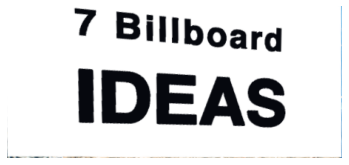

In [6]:
    warped = apply_perspective_transform(image, anchor_points)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
## Hence perspective transform has been applied !!